In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dataset=pd.read_csv("http://iali.in/datasets/IEEEAPSIT/unsupervised-ml/Wholesale%20customers%20data.csv")
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
dataset.keys()

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
print(dataset['Region'])

0      3
1      3
2      3
3      3
4      3
      ..
435    3
436    3
437    3
438    3
439    3
Name: Region, Length: 440, dtype: int64


In [0]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()
scaler.fit(dataset)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
scaled_data=scaler.transform(dataset)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca=PCA(n_components=2)

In [10]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
x_pca=pca.transform(scaled_data)

In [12]:
scaled_data.shape

(440, 8)

In [13]:
x_pca.shape

(440, 2)

In [0]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [16]:
km=KMeans(n_clusters=5, max_iter=400, algorithm='auto')
km.fit(x_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=400,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
y_predicted=km.fit_predict(x_pca)
y_predicted

array([0, 0, 0, 4, 1, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 4, 4, 4,
       1, 2, 0, 0, 4, 4, 0, 1, 4, 4, 4, 1, 4, 0, 1, 0, 0, 1, 1, 4, 0, 0,
       0, 0, 0, 2, 0, 0, 4, 4, 4, 0, 4, 4, 2, 0, 4, 4, 0, 2, 0, 0, 4, 2,
       4, 0, 4, 4, 1, 1, 4, 1, 0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0, 2, 2, 1,
       4, 1, 4, 1, 2, 1, 0, 4, 0, 4, 4, 4, 0, 0, 0, 1, 4, 4, 0, 0, 0, 0,
       4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 1, 1, 1, 0, 4, 1, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 0, 4, 0,
       1, 4, 4, 4, 4, 3, 0, 3, 4, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 1, 1, 0,
       4, 4, 0, 0, 1, 4, 4, 0, 4, 0, 4, 0, 4, 2, 4, 4, 0, 0, 0, 4, 0, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 4,
       4, 4, 4, 0, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 1, 1, 4, 4, 4, 4,
       0, 1, 0, 1, 0, 4, 4, 4, 4, 1, 4, 4, 1, 1, 4, 0, 4, 0, 1, 1, 1, 4,
       4, 1, 4, 1, 4, 4, 4, 0, 4, 4, 4, 0, 0, 4, 0,

In [34]:
dataset['cluster']=y_predicted
dataset.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,1


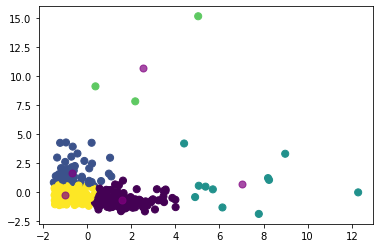

In [35]:
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_predicted,s=50,cmap='viridis')
centers=km.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='purple',s=50,alpha=0.7)